## 致密度数据标准化建模

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,\
ConstantKernel as c
from sklearn.gaussian_process.kernels import WhiteKernel
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib.pyplot import MultipleLocator
import xlwt
import warnings

In [71]:
from pyecharts.charts import Bar3D
from pyecharts.charts import Surface3D
from pyecharts import options as opts

In [72]:
sns.set()
warnings.filterwarnings('ignore')

In [73]:
plt.rcParams['font.sans-serif'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False

In [74]:
font1 = {
    'family': 'SimSun',
    'weight': 'bold',
    'size': 18
}
font2 = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 13
}
font3 = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 10
}

#### 读取数据

In [75]:
filepath = 'C:/Users/123456/Desktop/graduation_pro/数据/不锈钢致密度/不锈钢致密度.xlsx'
df = pd.read_excel(filepath)
df.head()

,2～1,P功率（W）,V速率（mm/s）,致密度
0,1,100.0,600.0,0.952212
1,2,130.0,600.0,0.950795
2,3,160.0,600.0,0.989356
3,4,190.0,600.0,0.985770
4,5,220.0,600.0,0.968996


In [76]:
df.drop('2～1', axis=1, inplace=True)
df.columns = ['power', 'speed', 'density']
df.head(15)

,power,speed,density
0,100.0,600.0,0.952212
1,130.0,600.0,0.950795
2,160.0,600.0,0.989356
3,190.0,600.0,0.985770
4,220.0,600.0,0.968996
5,250.0,600.0,0.978332
6,280.0,600.0,0.973611
7,310.0,600.0,0.986012
8,340.0,600.0,0.983308
9,NaN,NaN,NaN


In [77]:
# 去除缺失值
df.dropna(axis=0, inplace=True)
df.shape
df.head(15)

,power,speed,density
0,100.0,600.0,0.952212
1,130.0,600.0,0.950795
2,160.0,600.0,0.989356
3,190.0,600.0,0.985770
4,220.0,600.0,0.968996
5,250.0,600.0,0.978332
6,280.0,600.0,0.973611
7,310.0,600.0,0.986012
8,340.0,600.0,0.983308
11,100.0,800.0,0.956505


In [78]:
# 致密度最大的点
df['density'].astype('float16')
df['density'].max()

0.9975200574654169

In [10]:
df.reset_index(drop=True, inplace=True)
df

,power,speed,density
0,100.0,600.0,0.952212
1,130.0,600.0,0.950795
2,160.0,600.0,0.989356
3,190.0,600.0,0.985770
4,220.0,600.0,0.968996
5,250.0,600.0,0.978332
6,280.0,600.0,0.973611
7,310.0,600.0,0.986012
8,340.0,600.0,0.983308
9,100.0,800.0,0.956505


In [11]:
data = df.pivot('speed', 'power', 'density')
data.sort_index(ascending=False, inplace=True)
data

power,100.0,130.0,160.0,190.0,220.0,250.0,280.0,310.0,340.0
speed,,,,,,,,,
1600.0,0.793254,0.873763,0.918126,0.955250,0.926922,0.973486,0.948392,0.974295,0.955709
1400.0,0.822740,0.898927,0.981866,0.977760,0.977215,0.984703,0.970013,0.988933,0.929515
1200.0,0.848913,0.928778,0.967685,0.973025,0.954435,0.973242,0.939559,0.943411,0.968577
1000.0,0.880706,0.949173,0.928073,0.981856,0.980548,0.981932,0.979274,0.991850,0.997520
800.0,0.956505,0.979496,0.987783,0.983056,0.983378,0.981750,0.985949,0.990262,0.973881
600.0,0.952212,0.950795,0.989356,0.985770,0.968996,0.978332,0.973611,0.986012,0.983308


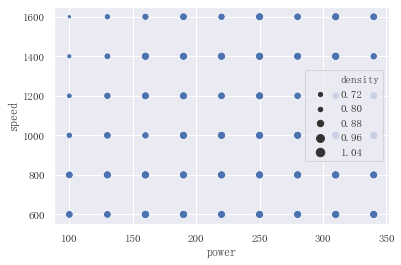

In [12]:
# 查看致密度的分布
sns.scatterplot(x='power', y='speed', size='density',\
               data=df)

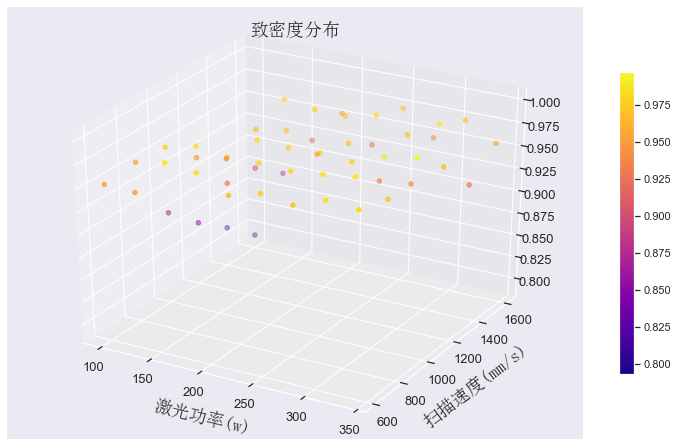

In [13]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig)
ax_obj = ax.scatter(df['power'], df['speed'],\
           np.float16(df['density']), c=df['density'],\
                   cmap=cm.plasma)
plt.colorbar(ax_obj, shrink=0.7)
ax.set_title('致密度分布', fontdict=font1)
ax.set_xlabel('\n激光功率(w)', fontdict=font1)
ax.set_ylabel('\n扫描速度(mm/s)', fontdict=font1)
plt.tick_params(labelsize=13)
plt.show()

In [14]:
data = df.pivot('speed', 'power', 'density')
data.sort_index(ascending=False, inplace=True)
data

power,100.0,130.0,160.0,190.0,220.0,250.0,280.0,310.0,340.0
speed,,,,,,,,,
1600.0,0.793254,0.873763,0.918126,0.955250,0.926922,0.973486,0.948392,0.974295,0.955709
1400.0,0.822740,0.898927,0.981866,0.977760,0.977215,0.984703,0.970013,0.988933,0.929515
1200.0,0.848913,0.928778,0.967685,0.973025,0.954435,0.973242,0.939559,0.943411,0.968577
1000.0,0.880706,0.949173,0.928073,0.981856,0.980548,0.981932,0.979274,0.991850,0.997520
800.0,0.956505,0.979496,0.987783,0.983056,0.983378,0.981750,0.985949,0.990262,0.973881
600.0,0.952212,0.950795,0.989356,0.985770,0.968996,0.978332,0.973611,0.986012,0.983308


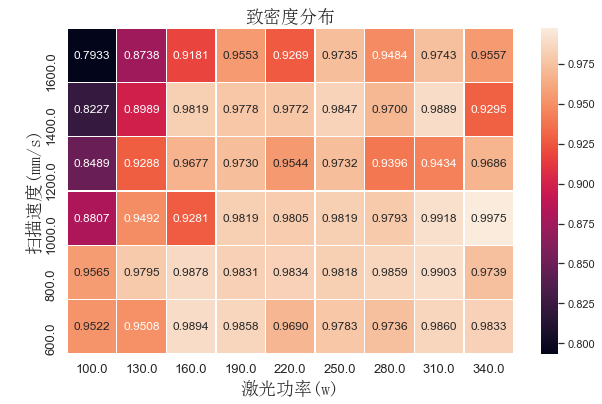

In [15]:
# 绘制颜色映射图
# df['porosity'] = df['porosity'].astype('float16')
# data = df.pivot(index='speed', columns='power', values='density')
f, ax = plt.subplots(figsize=(10,6))
ax_obj1 = sns.heatmap(data, annot=True, linewidths=.5, ax=ax,\
                     fmt='.4f')
# plt.colorbar(ax_obj1, shrink=0.7)
plt.title('致密度分布', fontdict=font1)
plt.xlabel('激光功率(w)', fontdict=font1)
plt.ylabel('\n扫描速度(mm/s)', fontdict=font1)
plt.tick_params(labelsize=13)
plt.show()

In [16]:
# pyecharts交互式可视化
# 数据准备（列表类型）
# power = df['power'].tolist()
# speed = df['speed'].tolist()
# density = []
# for row in df.iterrows():
#     density.append(row[1].tolist())

In [17]:
###### (
#     Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
#     .add(
#         series_name="",
#         data=density,
#         xaxis3d_opts=opts.Axis3DOpts(type_="value", data=power),
#         yaxis3d_opts=opts.Axis3DOpts(type_="value", data=speed),
#         zaxis3d_opts=opts.Axis3DOpts(type_="value"),
#     )
#     .set_global_opts(
#         visualmap_opts=opts.VisualMapOpts(
#             max_=1,
#             min_=0.80,
#             split_number=10,
#             range_color=[
#                 "#313695",
#                 "#4575b4",
#                 "#74add1",
#                 "#abd9e9",
#                 "#e0f3f8",
#                 "#ffffbf",
#                 "#fee090",
#                 "#fdae61",
#                 "#f46d43",
#                 "#d73027",
#                 "#a50026",
#             ],
#         )
#     )
#     .render("density_bar3d.html")
# #     .render_notebook()
# )

## 数据标准化，0均值，1方差

In [18]:
scaler_X = StandardScaler().fit(df[['power', 'speed']])
scaler_X.mean_
new_X = scaler_X.transform(df[['power', 'speed']])

In [19]:
scaler_Y = StandardScaler().fit(df[['density']])
scaler_Y.mean_
scaler_Y.scale_
new_Y = scaler_Y.transform(df[['density']])

In [20]:
new_Y
new_X[:,0]

array([-1.54919334, -1.161895  , -0.77459667, -0.38729833,  0.        ,
        0.38729833,  0.77459667,  1.161895  ,  1.54919334, -1.54919334,
       -1.161895  , -0.77459667, -0.38729833,  0.        ,  0.38729833,
        0.77459667,  1.161895  ,  1.54919334, -1.54919334, -1.161895  ,
       -0.77459667, -0.38729833,  0.        ,  0.38729833,  0.77459667,
        1.161895  ,  1.54919334, -1.54919334, -1.161895  , -0.77459667,
       -0.38729833,  0.        ,  0.38729833,  0.77459667,  1.161895  ,
        1.54919334, -1.54919334, -1.161895  , -0.77459667, -0.38729833,
        0.        ,  0.38729833,  0.77459667,  1.161895  ,  1.54919334,
       -1.54919334, -1.161895  , -0.77459667, -0.38729833,  0.        ,
        0.38729833,  0.77459667,  1.161895  ,  1.54919334])

In [21]:
# 标准化之后的数据表
new_df = pd.DataFrame()
new_df['power'] = new_X[:, 0].ravel()
new_df['speed'] = new_X[:, 1].ravel()
new_df['density'] = new_Y.ravel()

In [22]:
new_df

,power,speed,density
0,-1.549193,-1.46385,-0.082816
1,-1.161895,-1.46385,-0.116087
2,-0.774597,-1.46385,0.789477
3,-0.387298,-1.46385,0.705258
4,0.000000,-1.46385,0.311350
5,0.387298,-1.46385,0.530586
6,0.774597,-1.46385,0.419734
7,1.161895,-1.46385,0.710943
8,1.549193,-1.46385,0.647452
9,-1.549193,-0.87831,0.017990


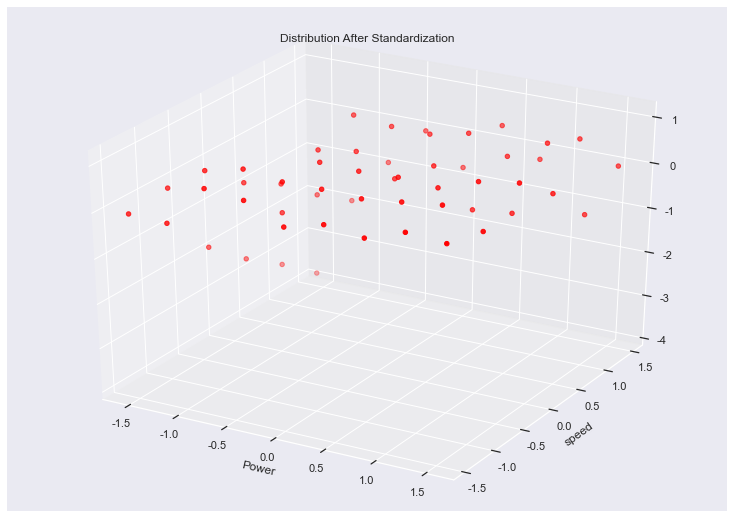

In [23]:
# 查看标准化后的数据的分布
fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig)
ax.scatter(new_df['power'], new_df['speed'],\
           new_df['density'], c='red')
ax.set_title('Distribution After Standardization')
ax.set_xlabel('Power')
ax.set_ylabel('speed')
plt.show()

### 高斯过程回归

In [24]:
# 核函数，常数核和高斯核，常数核可缩放均值
# kernel = c(1.0, (1e-4, 1e+2)) * RBF(length_scale=1.0,\
#                                     length_scale_bounds=(1e-2, 1e+5))

In [25]:
# 构建回归器，优化10轮，alpha值设置为0
# reg = GaussianProcessRegressor(kernel=kernel,\
#                                n_restarts_optimizer=10,\
#                                alpha=0,
#                               random_state=42)
# reg.fit(df[['power', 'speed']], df['density'])

In [26]:
# print(reg.kernel_)
# print(reg.kernel_.theta)
# print(reg.log_marginal_likelihood())
# print(reg.log_marginal_likelihood(reg.kernel.theta))
# reg.get_params()

In [27]:
# constant_value = reg.kernel_.k1.constant_value
# length_scale = reg.kernel_.k2.length_scale
# print('optimized length_scale: {}\n optimized constant_value: {}'\
#      .format(length_scale, constant_value))

In [28]:
# reg.log_marginal_likelihood_value_
# reg.log_marginal_likelihood(reg.kernel_.theta)

In [29]:
# # 创建作图的网格测试数据
# p_min, p_max = df['power'].min(),\
# df['power'].max()
# s_min, s_max = df['speed'].min(),\
# df['speed'].max()
# print(p_max, p_min)
# print(s_max, s_min)
# p_set, s_set = np.meshgrid(np.arange(p_min, p_max, 1),\
#                           np.arange(s_min, s_max, 1))

In [30]:
# # 查看网格数据输出结果并返回标准差
# output, err = reg.predict(np.c_[p_set.ravel(), s_set.ravel()]\
#                          , return_std=True)
# output, err = output.reshape(p_set.shape), err.reshape(p_set.shape)
# sigma = np.sum(reg.predict(df[['power', 'speed']],\
#                           return_std=True)[1])

In [31]:
# 上下置信区间
# up, down = output * (1 + 1.96*err), output * (1 - 1.96*err)

In [32]:
# output

In [33]:
# output_data = pd.DataFrame(columns=['power', 'speed', 'density'])
# output_data['power'] = p_set.ravel()
# output_data['speed'] = s_set.ravel()
# output_data['density'] = output.ravel()
# output_data.shape

In [34]:
# 拟合的决定系数
# reg.score(df[['power', 'speed']], df['density'])

In [35]:
# plt.figure()
# theta0 = np.logspace(-2, 3, 49)
# theta1 = np.logspace(-2, 0, 50)
# Theta0, Theta1 = np.meshgrid(theta0, theta1)
# LML = [[reg.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))\
#         for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
# LML = np.array(LML).T
# vmin, vmax = (-LML).min(), (-LML).max()
# vmin = 20
# vmax = 50
# level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
# plt.contour(Theta0, Theta1, -LML, \
#             levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
# plt.colorbar()
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("Length-scale")
# plt.ylabel("Noise-level")
# plt.title("Log-marginal-likelihood")
# plt.tight_layout()
# plt.show()

In [36]:
# reg.kernel_.theta
# LML

In [37]:
# output_pivot = output_data.pivot('power', 'speed', 'density')
# f, ax = plt.subplots(figsize=(30,15))
# sns.heatmap(output_pivot, ax=ax)
# ax.set_title('constant kernel heatmap', fontsize=30)

In [38]:
# 作图
# fig = plt.figure(figsize=(60,30))
# ax1 = fig.add_subplot(111, projection='3d')
# surf = ax1.plot_wireframe(p_set, s_set, output, rstride=10,\
#                           cstride=2, antialiased=True)
# # 上界置信区间
# # surf_u = ax1.plot_wireframe(p_set, s_set, up, colors=\
# #                             'lightgreen', linewidths=1,\
# #                             rstride=10, cstride=2, antialiased=True)
# # 下界置信区间
# # surf_d = ax1.plot_wireframe(p_set, s_set, down, colors=\
# #                             'lightgreen', linewidths=1,\
# #                             rstride=10, cstride=2, antialiased=True)
# ax1.scatter(df['power'], df['speed'],\
#             np.float16(df['density']), c='red', s=50)
# ax1.set_title('density of different parameters\nconstant kernel', fontsize=30)
# ax1.set_xlabel('power', fontsize=30)
# ax1.set_ylabel('speed', fontsize=30)
# plt.tick_params(labelsize=20)
# plt.show()

In [39]:
# # 绘制等高线图
# plt.figure(figsize=(15,7))
# plt.contourf(p_set, s_set, output, offset=0, cmap=cm.coolwarm, alpha=0.6)
# plt.colorbar()
# plt.title('density contour distribution')
# plt.xlabel('power')
# plt.ylabel('speed')

In [40]:
# # 绘制等高线图
# plt.figure()
# contour = plt.contour(p_set, s_set, output, offset=0, cmap=cm.coolwarm, alpha=0.6)
# plt.colorbar()
# plt.title('density contour distribution')
# plt.xlabel('power')
# plt.ylabel('speed')
# plt.clabel(contour)

#### 带噪声的核函数，高斯核加上白噪声核

In [25]:
kernel_1 = 1.0 * RBF(length_scale=1,\
                   length_scale_bounds=(1e-3, 1e2)) +\
WhiteKernel(noise_level=1e-4, noise_level_bounds=(1e-10, 1e+1))

In [26]:
# 构建回归器，优化10轮，噪声水平设置为零
reg_1 = GaussianProcessRegressor(kernel=kernel_1,\
                               n_restarts_optimizer=12,\
                               alpha=0, random_state=42)
reg_1.fit(new_df[['power', 'speed']], new_df['density'])

GaussianProcessRegressor(alpha=0, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.0001),
                         n_restarts_optimizer=12, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=42)

In [27]:
theta = reg_1.kernel_.k1.theta
noise_level = reg_1.kernel_.k2.noise_level
print('optimized theta: {}\n optimized noise_level: {}'\
     .format(theta, noise_level))

optimized theta: [0.92151279 0.06544947]
 optimized noise_level: 0.14548274743317716


In [28]:
reg_1.get_params()
reg_1.log_marginal_likelihood()

-50.11074548292869

In [29]:
# 创建作图的网格测试数据
p_min, p_max = new_df['power'].min(),\
new_df['power'].max()
s_min, s_max = new_df['speed'].min(),\
new_df['speed'].max()
print(p_max, p_min)
print(s_max, s_min)
p_set1, s_set1 = np.meshgrid(np.arange(p_min, p_max + 0.3, 0.01),\
                          np.arange(s_min, s_max + 0.3, 0.01))

1.5491933384829668 -1.5491933384829668
1.4638501094227996 -1.4638501094227996


In [30]:
p_set1.shape

(323, 340)

In [31]:
# 查看网格数据输出结果并返回标准差
output1, std = reg_1.predict(np.c_[p_set1.ravel(), s_set1.ravel()]\
                         , return_std=True)
output1, std = output1.reshape(p_set1.shape), std.reshape(p_set1.shape)
# sigma = np.sum(reg_1.predict(df[['power', 'speed']],\
#                           return_std=True)[1])

In [32]:
# 上下置信区间
up, down = output1 * (1 + 1.96*std), output1 * (1 - 1.96*std)

In [33]:
output1

array([[ 2.25318807e-03,  1.11224408e-02,  2.00009208e-02, ...,
         5.16268158e-01,  5.13444278e-01,  5.10569723e-01],
       [ 4.38518630e-03,  1.33340111e-02,  2.22917149e-02, ...,
         5.21208457e-01,  5.18354276e-01,  5.15449185e-01],
       [ 6.29477767e-03,  1.53234332e-02,  2.43606317e-02, ...,
         5.26155541e-01,  5.23271454e-01,  5.20336215e-01],
       ...,
       [-3.46820809e+00, -3.44205498e+00, -3.41564491e+00, ...,
        -5.47802221e-02, -6.09891274e-02, -6.72360664e-02],
       [-3.46752128e+00, -3.44162699e+00, -3.41547635e+00, ...,
        -5.17133115e-02, -5.78710438e-02, -6.40676319e-02],
       [-3.46659662e+00, -3.44096186e+00, -3.41507136e+00, ...,
        -4.86777049e-02, -5.47833717e-02, -6.09287138e-02]])

In [34]:
# 高斯置信区间下界
ucb_1 = output1 + 0.1*std
ucb_2 = output1 + 1*std
ucb_3 = output1 + 100*std

In [35]:
output1_data = pd.DataFrame(columns=['power', 'speed', 'density'])
output1_data['power'] = p_set1.ravel()
output1_data['speed'] = s_set1.ravel()
output1_data['density'] = output1.ravel()
output1_data.shape

(109820, 3)

In [36]:
# 拟合的决定系数
reg_1.score(new_df[['power', 'speed']], new_df['density'])

0.8988801181071007

In [37]:
# 预测数据的反归一化
scale_X = scaler_X.inverse_transform(output1_data[['power', 'speed']])
scale_Y = scaler_Y.inverse_transform(output1_data[['density']])

In [38]:
# 方差反归一化(是否是用scaler_Y?)
scale_std = scaler_Y.inverse_transform(std.ravel())

In [39]:
new_output = pd.DataFrame(columns=['power', 'speed', 'density'])
new_output['power'] = scale_X[:, 0].ravel()
new_output['speed'] = scale_X[:, 1].ravel()
new_output['density'] = scale_Y.ravel()

In [40]:
new_output.head()

,power,speed,density
0,100.000000,600.0,0.955834
1,100.774597,600.0,0.956212
2,101.549193,600.0,0.956590
3,102.323790,600.0,0.956969
4,103.098387,600.0,0.957347


In [41]:
p_inverse = scale_X[:, 0].reshape(p_set1.shape)
s_inverse = scale_X[:, 1].reshape(s_set1.shape)
out_inverse = scale_Y.reshape(p_set1.shape)

In [42]:
p_inverse.max()
s_inverse.max()

1699.8393822129979

Text(0.5, 1.0, 'noise kernel heatmap')

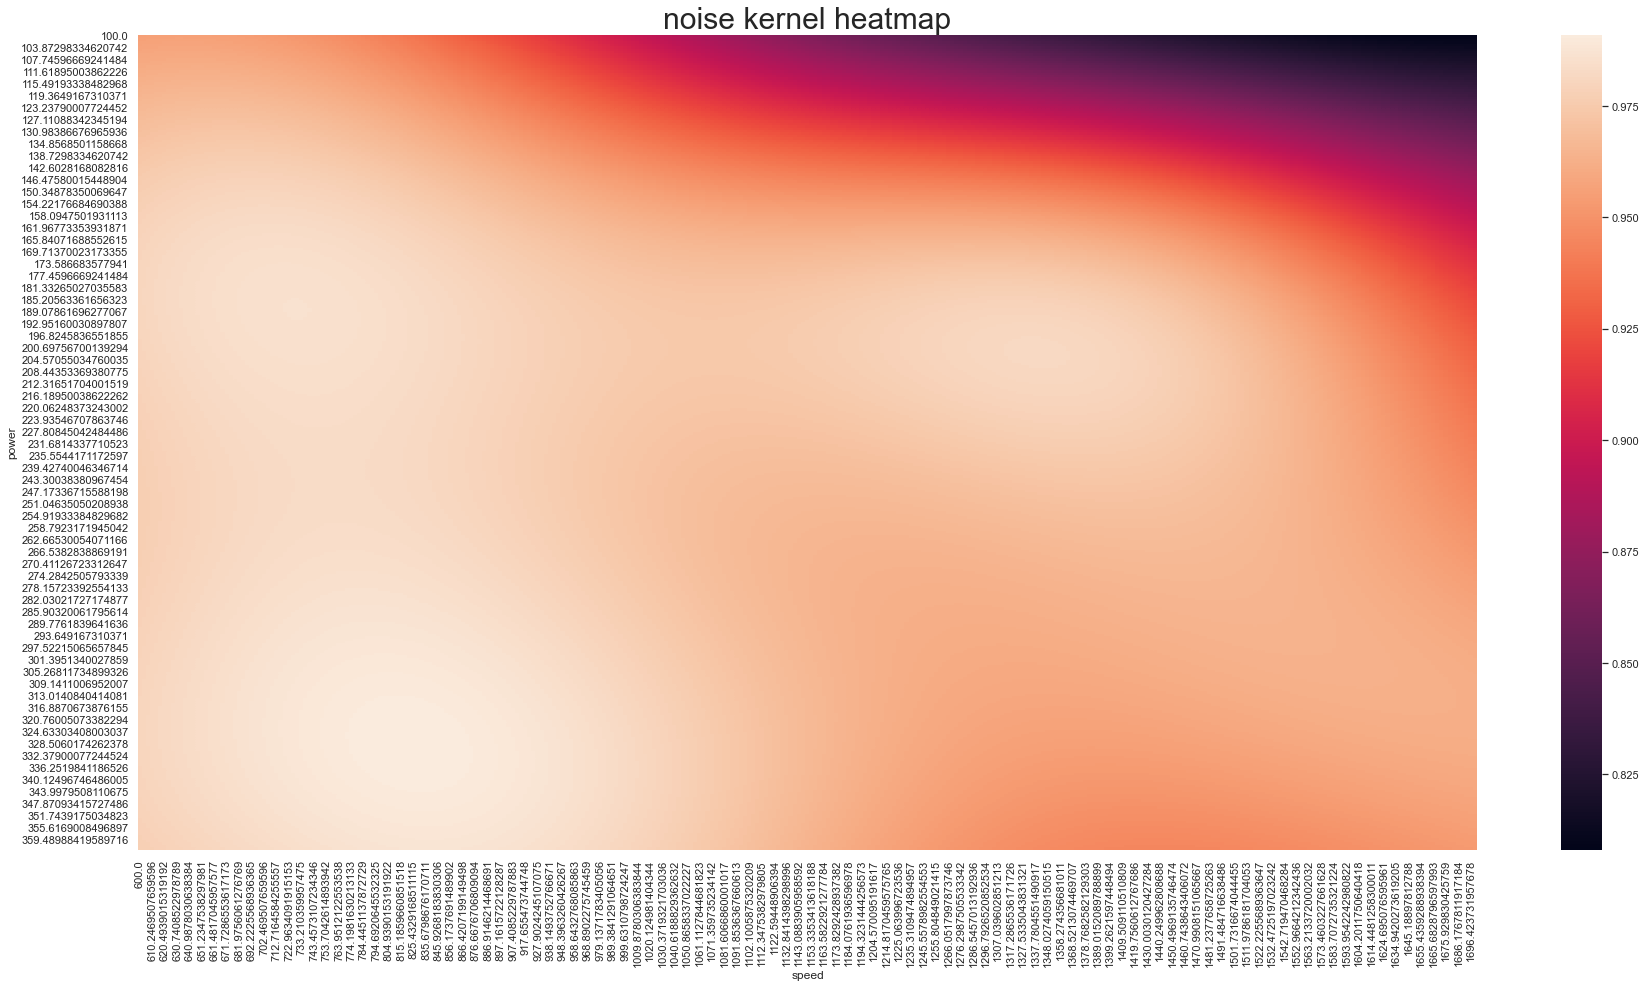

In [43]:
output_pivot = new_output.pivot('power', 'speed', 'density')
f, ax = plt.subplots(figsize=(30,15))
sns.heatmap(output_pivot, ax=ax)
ax.set_title('noise kernel heatmap', fontsize=30)

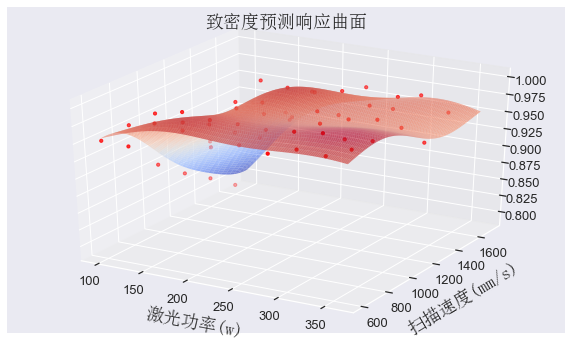

In [44]:
# 作图
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(p_inverse, s_inverse, out_inverse, rstride=10,\
                          cmap=cm.coolwarm, cstride=2, antialiased=True,\
                       linewidth=0, alpha=0.7)
# 上界置信区间
# surf_u = ax1.plot_wireframe(p_set, s_set, up, colors=\
#                             'lightgreen', linewidths=1,\
#                             rstride=10, cstride=2, antialiased=True)
# 下界置信区间
# surf_d = ax1.plot_wireframe(p_set, s_set, down, colors=\
#                             'lightgreen', linewidths=1,\
#                             rstride=10, cstride=2, antialiased=True)
ax1.scatter(df['power'], df['speed'],\
            np.float16(df['density']), c='red', s=10)
ax1.set_title('致密度预测响应曲面', fontdict=font1)
ax1.set_xlabel('\n激光功率(w)', fontdict=font1)
ax1.set_ylabel('\n扫描速度(mm/s)', fontdict=font1)
plt.tick_params(labelsize=13)
plt.show()

In [45]:
# 曲面可视化
# 数据准备
x = p_inverse.ravel()
y = s_inverse.ravel()
z = out_inverse.ravel()
point_obj = zip(x, y, z)
data = []
for point in point_obj:
    data.append(point)
len(data)

109820

In [46]:
(
    Surface3D(init_opts=opts.InitOpts(width="1600px",\
                                      height="800px"))
    .add(
        series_name="",
        shading="color",
        data=data,
        xaxis3d_opts=opts.Axis3DOpts(type_="value"),
        yaxis3d_opts=opts.Axis3DOpts(type_="value"),
        grid3d_opts=opts.Grid3DOpts(width=100, height=40, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            dimension=2,
            max_=1,
            min_=0.77,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render("density_surface_wave.html")
)

'C:\\Users\\123456\\PycharmProjects\\test\\Data_visualization\\jupyter_notebook\\Intelligent_3Dprinting\\density_surface_wave.html'

In [47]:
# df.columns = ['power', 'speed', 'Density']
# df.head()

In [48]:
out_inverse.max()

0.9910169622942328

In [49]:
# 定义绘图使用的字体
sns.set_style('white')
font1 = {
    'family': 'Times New Roman',
    'weight': 'bold',
    'size': 30
}
font2 = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 15
}
font3 = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 30
}

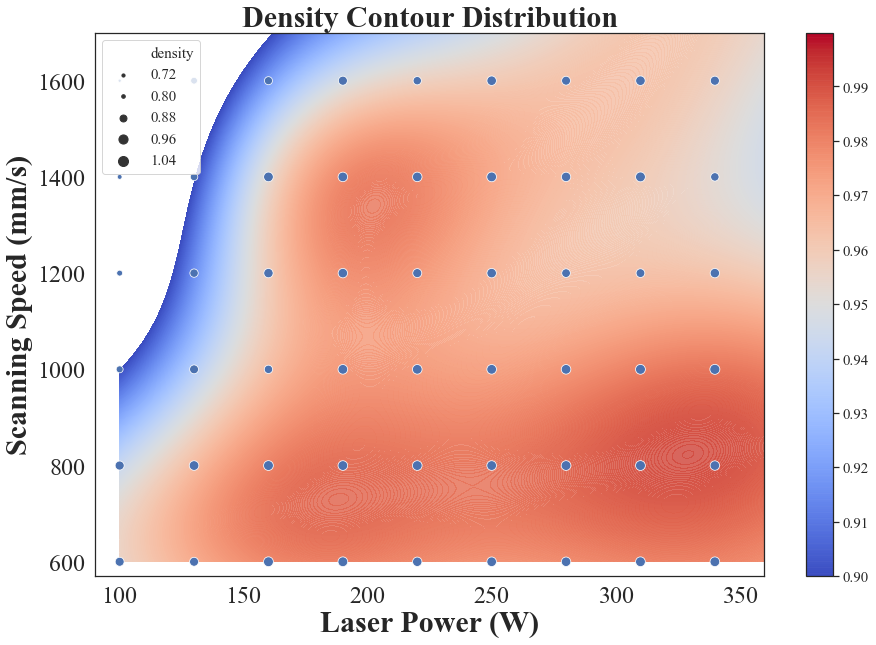

In [50]:
# 绘制等高线图
fig, ax = plt.subplots(figsize=(15,10))
plt.contourf(p_inverse, s_inverse,\
             out_inverse, np.arange(0.9, 1, 0.0001),\
                   offset=0, cmap=cm.coolwarm,\
             alpha=0.85)
sns.scatterplot(x='power', y='speed', size='density',\
               data=df, sizes=(10, 100))
# 设置legend中的字体即legend位置
plt.legend(loc='upper left', prop=font2)
# 设置刻度字体
plt.tick_params(labelsize=24)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
# 设置colorbar中label的字体
cb = plt.colorbar()
cb_labels = cb.ax.yaxis.get_ticklabels()
for cb_label in cb_labels:
    cb_label.set_family('Times New Roman')
    cb_label.set_fontsize(15)
# sns.scatterplot(x='power', y='speed', size='density',\
#                data=df)
# 设置坐标刻度
x_tick = [100 + i*50 for i in range(6)]
y_tick = [600 + j*200 for j in range(6)]
plt.xticks(x_tick, fontsize=24)
plt.yticks(y_tick, fontsize=24)
# 设置坐标刻度显示范围
plt.xlim(90, 360)
plt.ylim(570, 1700)
plt.title('Density Contour Distribution', fontdict=font1)
plt.xlabel('Laser Power (W)', fontdict=font1)
plt.ylabel('Scanning Speed (mm/s)', fontdict=font1)
plt.show()

In [51]:
output1_data.head()

,power,speed,density
0,-1.549193,-1.46385,0.002253
1,-1.539193,-1.46385,0.011122
2,-1.529193,-1.46385,0.020001
3,-1.519193,-1.46385,0.028886
4,-1.509193,-1.46385,0.037775


In [52]:
# pyecharts动态可视化热力图
# from pyecharts.charts import HeatMap

In [53]:
#  数据准备
# power = output1_data['power'].tolist()
# speed = output1_data['speed'].tolist()
# density_value = []
# for row in output1_data.iterrows():
#     density_value.append(list(row[1]))  

In [54]:
# c = (
#     HeatMap()
#     .add_xaxis(power)
#     .add_yaxis('serie0', speed, value=density_value)
#     .set_global_opts(title_opts=opts.TitleOpts(title='density heatmap'),
#                     visualmap_opts=opts.VisualMapOpts(
#                     min_=0.75555,
#                     max_=1,
#                     split_number=10))
#     .render('density_heatmap.html') 
# )

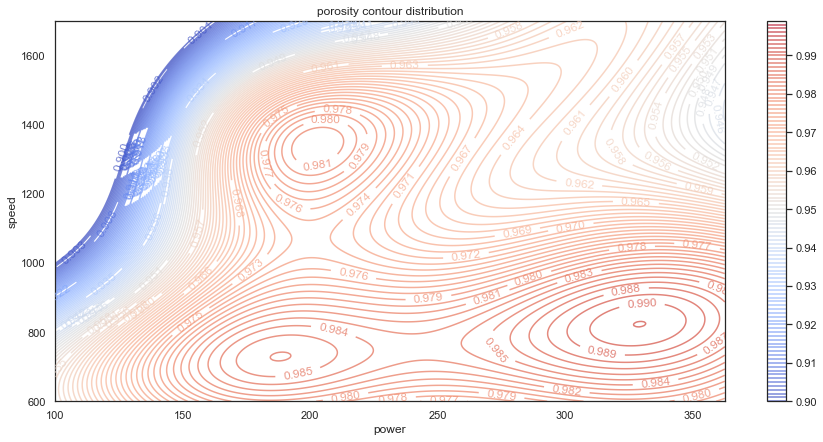

In [55]:
# 绘制等高线图
plt.figure(figsize=(15,7))
contour = plt.contour(p_inverse, s_inverse, out_inverse,\
                      np.arange(0.9, 1, 0.001),
                      off_set=0, cmap=cm.coolwarm, alpha=0.7)
plt.colorbar()
plt.title('porosity contour distribution')
plt.xlabel('power')
plt.ylabel('speed')
plt.clabel(contour)
plt.show()

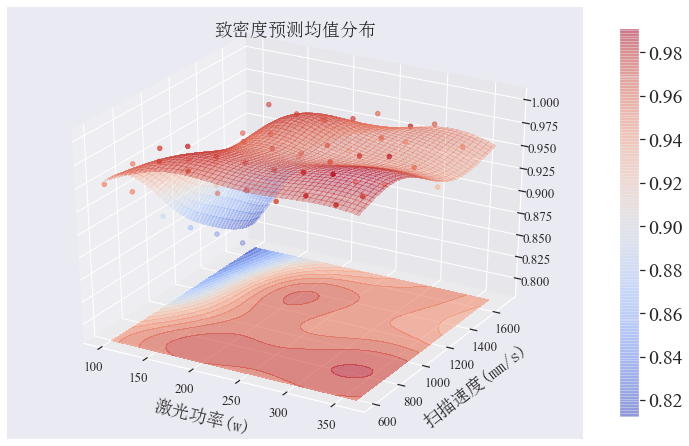

In [106]:
# 绘制曲面，等高线，散点图的结合图
sns.set(
    style='darkgrid',
    font='Times New Roman',
    font_scale=1.8
)
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig)
surface = ax.plot_surface(p_inverse, s_inverse, out_inverse,\
                          cmap=cm.coolwarm, linewidth=0,\
                          alpha=0.3, antialiased=False)
ax.scatter(df['power'], df['speed'], df['density'],\
           c=df['density'], cmap=cm.coolwarm)
ax.contourf(p_inverse, s_inverse, out_inverse, np.arange(0.8, 1.01, 0.01),\
            zdir='output1', offset=0.778, cmap=cm.coolwarm, alpha=0.6)
# 设置title, xyz_label
ax.set_title('致密度预测均值分布', fontdict=font1)
ax.set_xlabel('\n激光功率(w)', fontdict=font1)
ax.set_ylabel('\n扫描速度(mm/s)', fontdict=font1)
# 添加colorbar
plt.colorbar(surface, shrink=0.9)
plt.tick_params(labelsize=13)
plt.show()

In [ ]:
# 箱型图绘制




## 边缘似然可视化

-51.483996218758605
-16545.804612928878


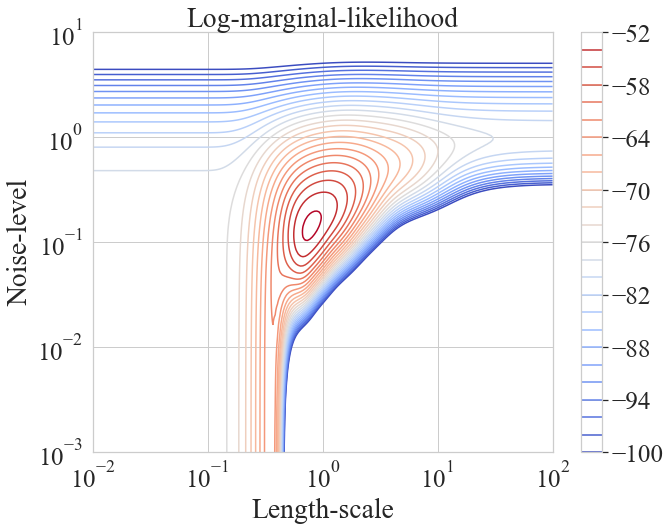

In [159]:
plt.figure(figsize=(10, 8))
theta0 = np.logspace(-2, 2, 200)
theta1 = np.logspace(-3, 1, 200)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[reg_1.log_marginal_likelihood(np.log([0.92, Theta0[i, j], Theta1[i, j]]))\
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (LML).min(), (LML).max()
print(vmax)
print(vmin)
# level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
# plt.contour(Theta0, Theta1, -LML,\
#             levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.contour(Theta0, Theta1, LML, np.arange(-100, -50, 2),\
           cmap=cm.coolwarm)
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()

### UCB选点

In [57]:
# 置信区间上界，β取值0.1， 1， 10， 100
ucb_1 = out_inverse + 0.01*std
ucb_2 = out_inverse + 0.1*std
ucb_3 = out_inverse + 1*std
ucb_4 = out_inverse + 10*std

In [58]:
# 计算UCB数据
output1_data = pd.DataFrame(columns=['power', 'speed', 'density'])
output1_data['power'] = p_inverse.ravel()
output1_data['speed'] = s_inverse.ravel()
output1_data['density'] = out_inverse.ravel()
# output1_data['uncertainty'] = (up - down).ravel()
# output1_data['ucb'] = output1_data['porosity'] + output1_data['uncertainty']
output1_data['ucb-0.01'] = ucb_1.ravel()
output1_data['ucb-0.1'] = ucb_2.ravel()
output1_data['ucb-1'] = ucb_3.ravel()
output1_data['ucb-10'] = ucb_4.ravel()
output1_data.head()

,power,speed,density,ucb-0.01,ucb-0.1,ucb-1,ucb-10
0,100.000000,600.0,0.955834,0.960635,1.003835,1.435845,5.755937
1,100.774597,600.0,0.956212,0.960989,1.003978,1.433870,5.732787
2,101.549193,600.0,0.956590,0.961344,1.004130,1.431993,5.710623
3,102.323790,600.0,0.956969,0.961701,1.004293,1.430214,5.689426
4,103.098387,600.0,0.957347,0.962059,1.004465,1.428530,5.669176


In [59]:
a = (p_inverse.min() + p_inverse.max())/2
b = (s_inverse.min() + s_inverse.max())/2

In [60]:
b

1149.919691106499

In [109]:
x1, y1, x2, y2 = [], [], [], []
for i in range(11):
    x1.append(a)
    y1.append(600 + 112*i)
    x2.append(100 + 26*i)
    y2.append(b)

In [111]:
a,b

(231.29413543643156, 1149.919691106499)

In [62]:
# 根据UCB，划分区域进行选点
temp1 = output1_data[(output1_data['power'] <= a) &\
                    (output1_data['speed'] <= b)]
temp2 = output1_data[(output1_data['power'] > a) &\
                    (output1_data['speed'] <= b)]
temp3 = output1_data[(output1_data['power'] <= a) &\
                    (output1_data['speed'] > b)]
temp4 = output1_data[(output1_data['power'] > a) &\
                    (output1_data['speed'] > b)]

In [63]:
ucb_res = pd.DataFrame(columns=['power', 'speed', 'density', 'ucb'])
temp = [temp1, temp2, temp3, temp4]
ucb = ['ucb-0.01', 'ucb-0.1', 'ucb-1', 'ucb-10']
k = 2
for t in temp:
    for u in ucb:
        sort_data = t.sort_values(by=u, ascending=False)
        filter_data = sort_data[['power', 'speed', 'density', u]].iloc[0:k]
        index = [u, u]
        filter_data.index = index
        filter_data.columns = ucb_res.columns
        ucb_res = pd.concat([ucb_res, filter_data])

In [64]:
ucb_data = ucb_res.drop_duplicates(subset=['power', 'speed'], keep='first')
ucb_data['ucbβ'] = ucb_data.index
ucb_data = ucb_data[['ucbβ', 'power', 'speed', 'density', 'ucb']]
ucb_data.shape

(22, 5)

In [65]:
ucb_data

,ucbβ,power,speed,density,ucb
ucb-0.01,ucb-0.01,188.304020,729.794710,0.986049,0.990276
ucb-0.01,ucb-0.01,187.529424,729.794710,0.986047,0.990275
ucb-1,ucb-1,100.000000,600.000000,0.955834,1.435845
ucb-1,ucb-1,100.000000,603.415650,0.955925,1.434076
ucb-0.01,ucb-0.01,331.604404,825.432917,0.991000,0.995375
ucb-0.01,ucb-0.01,330.829807,825.432917,0.991009,0.995374
ucb-0.1,ucb-0.1,362.588271,835.679868,0.987598,1.043002
ucb-0.1,ucb-0.1,362.588271,832.264217,0.987587,1.043000
ucb-1,ucb-1,362.588271,600.000000,0.977479,1.574122
ucb-1,ucb-1,362.588271,603.415650,0.977687,1.572235


In [56]:
# 写入ucb挑选数据
save_path = 'C:/Users/123456/Desktop/graduation_pro/数据/\
不锈钢致密度/density_standard_ucb.xls'
size = ucb_data.shape
work_book = xlwt.Workbook(encoding='utf-8')
work_sheet = work_book.add_sheet('density_ucb')
columns = list(ucb_data.columns)
for i in range(size[1]):
    work_sheet.write(0, i, columns[i])
for i in range(size[0]):
    for j in range(size[1]):
        work_sheet.write(i+1, j, ucb_data.iloc[i, j])
work_book.save(save_path)
print('Done!')

Done!


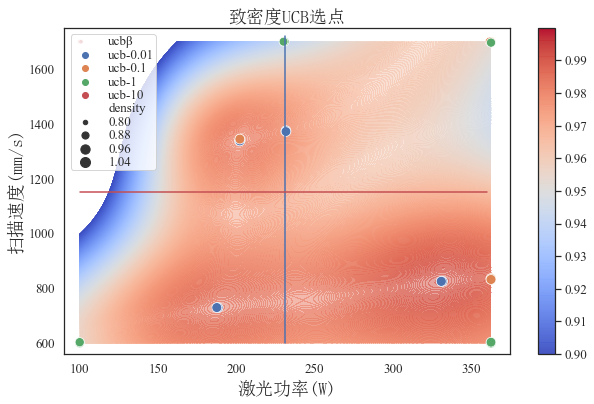

In [110]:
# UCB选点数据可视化对比
# 绘制等高线图
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))
plt.contourf(p_inverse, s_inverse,\
             out_inverse, np.arange(0.9, 1, 0.0001),\
                   offset=0, cmap=cm.coolwarm,\
             alpha=0.5)
p1 = sns.scatterplot(x='power', y='speed', size='density',\
                hue='ucbβ',\
                     hue_order=['ucb-0.01', 'ucb-0.1', 'ucb-1', 'ucb-10'],\
                     sizes=(20, 100), data=ucb_data)
# 设置legend中的字体即legend位置
plt.legend(loc='upper left', prop=font2)
# 设置刻度字体
plt.tick_params(labelsize=13)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
# 设置colorbar中label的字体
cb = plt.colorbar()
cb_labels = cb.ax.yaxis.get_ticklabels()
for cb_label in cb_labels:
    cb_label.set_family('Times New Roman')
    cb_label.set_fontsize(13)
# 设置坐标刻度
x_tick = [100 + i*50 for i in range(6)]
y_tick = [600 + j*200 for j in range(6)]
plt.xticks(x_tick, fontsize=13)
plt.yticks(y_tick, fontsize=13)
# 设置坐标刻度显示范围
plt.xlim(90, 375)
plt.ylim(560, 1750)
plt.plot(x1, y1)
plt.plot(x2, y2, 'r')
plt.title('致密度UCB选点', fontdict=font1)
plt.xlabel('激光功率(W)', fontdict=font1)
plt.ylabel('扫描速度(mm/s)', fontdict=font1)
p1.legend(loc='upper left', prop=font2, labelspacing=0.1,\
         borderpad=0.1)
plt.show()

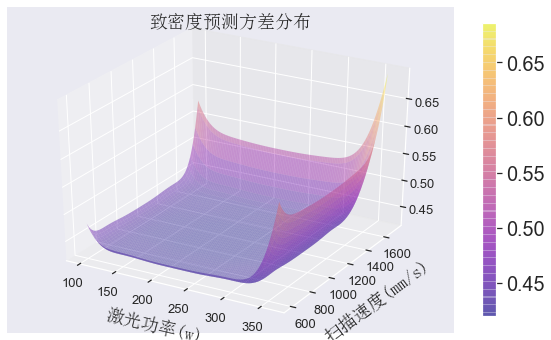

In [75]:
# 方差可视化
sns.set_style('darkgrid')
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111, projection='3d')
surf = ax1.plot_surface(p_inverse, s_inverse, std, rstride=8,\
                        cstride=3, linewidth=0, alpha=0.4,\
                        antialiased=True, cmap=cm.plasma)
ax1.set_title('致密度预测方差分布', fontdict=font1)
ax1.set_xlabel('\n激光功率(w)', fontdict=font1)
ax1.set_ylabel('\n扫描速度(mm/s)', fontdict=font1)
plt.colorbar(surf, shrink=0.9)
plt.tick_params(labelsize=13)
plt.show()

In [73]:
std.min()

0.41966320295882314

### 边缘似然可视化

106.76318235045386
-2346.846427167815


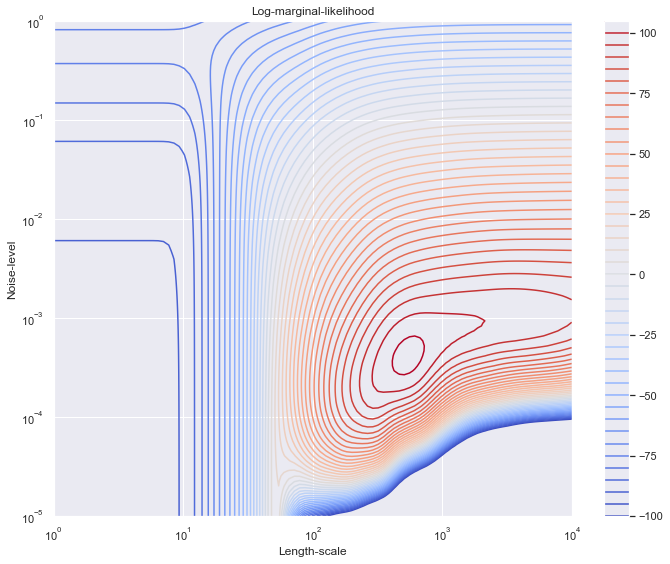

In [103]:
plt.figure(figsize=(10, 8))
theta0 = np.logspace(0, 4, 100)
theta1 = np.logspace(-5, 0, 100)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[reg_1.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))\
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (LML).min(), (LML).max()
print(vmax)
print(vmin)
# level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
# plt.contour(Theta0, Theta1, -LML,\
#             levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.contour(Theta0, Theta1, LML, np.arange(-100, 110, 5),\
           cmap=cm.coolwarm)
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
plt.show()